### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings; warnings.filterwarnings("ignore")

In [2]:
# check the version of matplot
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

### Importing Dataframe

In [4]:
df=pd.read_pickle('../Prepared Data/df_clean.pkl')

### Exploring the data

In [6]:
df.shape

(1337, 8)

In [7]:
df.columns

Index(['Age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges',
       'Price category'],
      dtype='object')

In [8]:
df.head()

,Age,sex,BMI,children,smoker,region,charges,Price category
0,19,female,27.900,0,yes,southwest,16884.92400,High price
1,18,male,33.770,1,no,southeast,1725.55230,Middle price
2,28,male,33.000,3,no,southeast,4449.46200,Middle price
3,33,male,22.705,0,no,northwest,21984.47061,High price
4,32,male,28.880,0,no,northwest,3866.85520,Middle price


In [9]:
# Check for missing values
df.isnull().sum()

Age               0
sex               0
BMI               0
children          0
smoker            0
region            0
charges           0
Price category    0
dtype: int64

In [10]:
df_dups = df.duplicated()

In [11]:
df_dups.shape

(1337,)

### Extreme Value Checks

Text(0.5, 1.0, 'Histogram of Charges with Extreme Value')

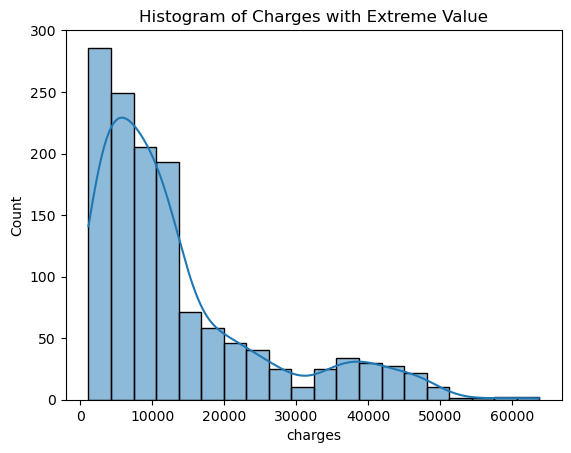

In [12]:
# show extreme 'charges'
sns.histplot(df['charges'], bins=20, kde = True)
plt.title('Histogram of Charges with Extreme Value') # add title

Text(0.5, 1.0, 'Histogram of BMI with Extreme Value')

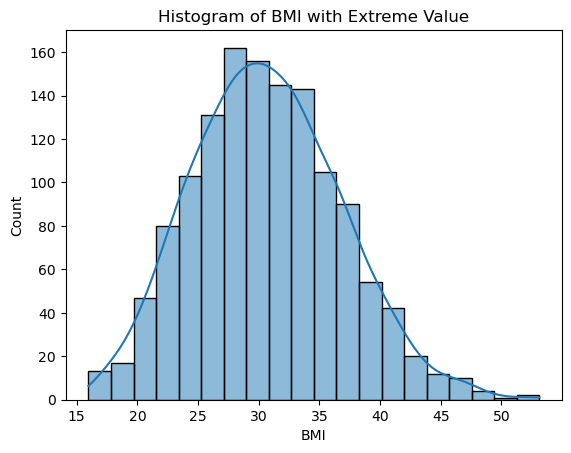

In [13]:
# show extreme 'BMI'
sns.histplot(df['BMI'], bins=20, kde = True)
plt.title('Histogram of BMI with Extreme Value') # add title

Text(0.5, 1.0, 'Histogram of Ages with Extreme Value')

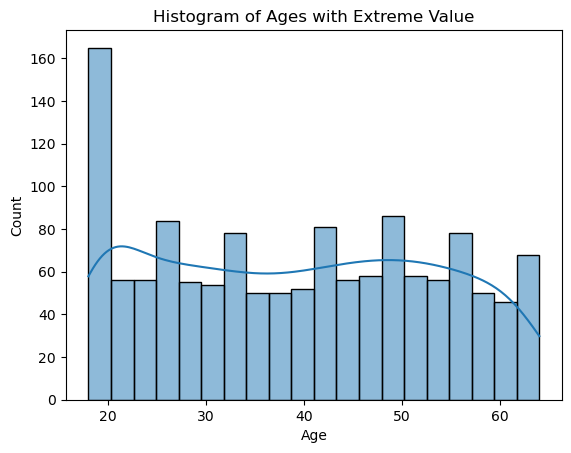

In [14]:
# show extreme 'Age'
sns.histplot(df['Age'], bins=20, kde = True)
plt.title('Histogram of Ages with Extreme Value') # add title

Text(0.5, 1.0, 'Histogram of Sex with Extreme Value')

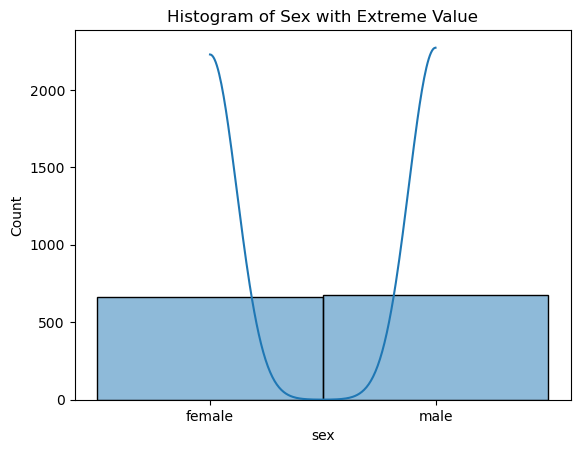

In [15]:
# show extreme 'sex'
sns.histplot(df['sex'], bins=20, kde = True)
plt.title('Histogram of Sex with Extreme Value') # add title

#### Hypothesis

1.There is a significant correlation between age and medical expenses.

2.There is a significant correlation between BMI and medical charges.

## Data prep for regression analysis

In [16]:
# There is a significant correlation between age and medical expenses.

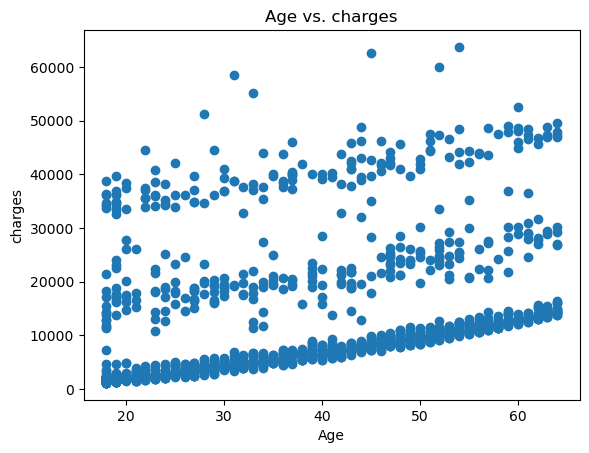

In [17]:
# Scatterplot for Age and Charges variables plot against each other.
plt.scatter(x=df['Age'], y=df['charges'])
plt.title('Age vs. charges')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Age'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [19]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [20]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [21]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# Regression Analysis

In [23]:
# Create a regression object.
# Regression object, which will be fit onto the training set
regression = LinearRegression()

In [24]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

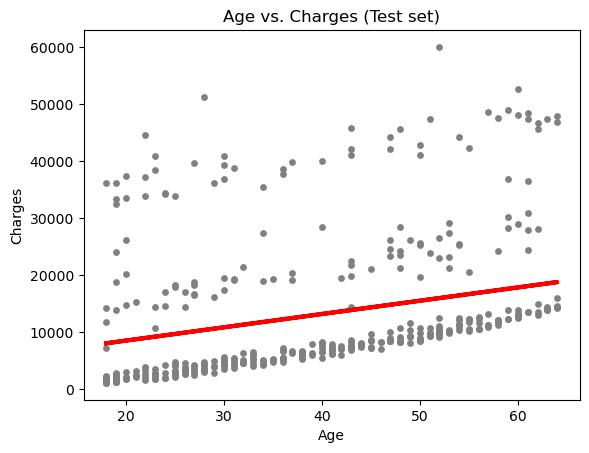

In [26]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs. Charges (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.
# This is the mean squared error
#rmse = mean_squared_error(y_test, y_predicted) 
# This is the R2 score.
#r2 = r2_score(y_test, y_predicted)

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Define mock data for demonstration purposes
y_actual = np.array([3, 5, 7, 9, 11])
y_predicted = np.array([3.2, 4.8, 6.9, 8.7, 10.5])

# Calculate mean squared error
mse = mean_squared_error(y_actual, y_predicted)

# Calculate RMSE as the square root of MSE
rmse = sqrt(mse)

# Calculate R2 score
r2 = r2_score(y_actual, y_predicted)

# Print the model summary statistics
print('Mean squared error (RMSE): ', rmse)
print('R2 score: ', r2)

Mean squared error (RMSE):  0.2932575659723038
R2 score:  0.98925


In [29]:
# Print the model summary statistics. 
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  0.2932575659723038
R2 score:  0.98925


In [30]:
# Define mock data for demonstration purposes
y_test = np.array([3, 5, 7, 9, 11])
y_predicted = np.array([3.2, 4.8, 6.9, 8.7, 10.5])
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3,3.2
1,5,4.8
2,7,6.9
3,9,8.7
4,11,10.5


In [31]:
# Compare how the regression fits the training set

In [32]:
# Predict.
# This is predicting X_train!
y_predicted_train = regression.predict(X_train)

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  128318059.75747488
R2 score:  0.07682646420531714


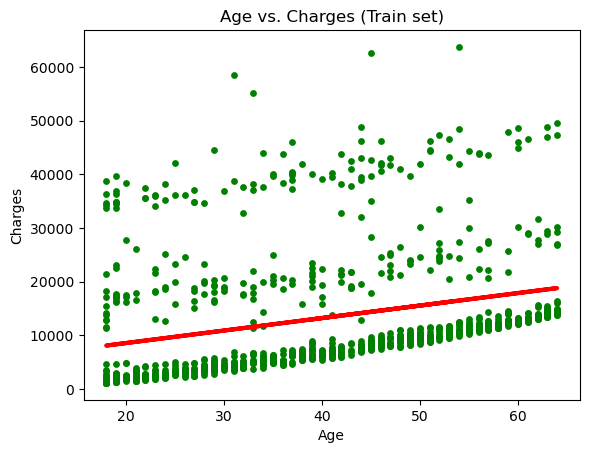

In [35]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs. Charges (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

In [36]:
# Model Modification

In [37]:
# New dataset for over 50 'Age'

In [38]:
# Model Modification based on people 50 years and above
df_new = df[df['Age']>=55]

In [39]:
df_new.shape

(242, 8)

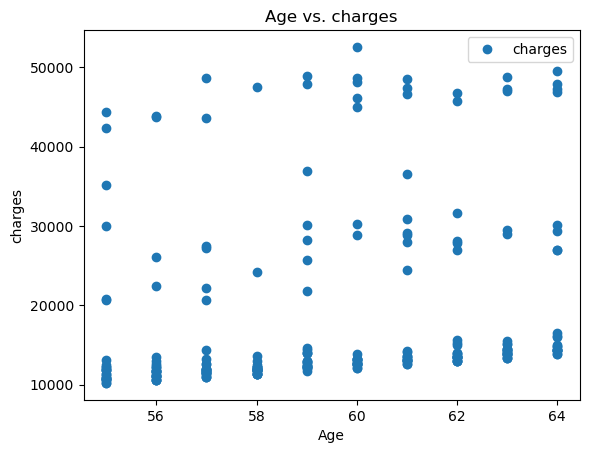

In [40]:
# Scatterplot to investigate how Age and Charges variables plot against each other.
df_new.plot(x = 'Age', y='charges',style='o')
plt.title('Age vs. charges')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

In [41]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_new['Age'].values.reshape(-1,1)
y = df_new['charges'].values.reshape(-1,1)

In [42]:
# Print the first 5 rows of X
subset_size = 5
print("Subset of X:")
print(X[:subset_size])

Subset of X:
[[60]
 [62]
 [56]
 [56]
 [60]]


In [43]:
# Print the first 5 rows of y
subset_size = 5
print("Subset of y:")
print(y[:subset_size])

Subset of y:
[[28923.13692]
 [27808.7251 ]
 [11090.7178 ]
 [10602.385  ]
 [13228.84695]]


In [44]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
# Regression Analysis

In [46]:
# Create a regression object.
# Regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [47]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

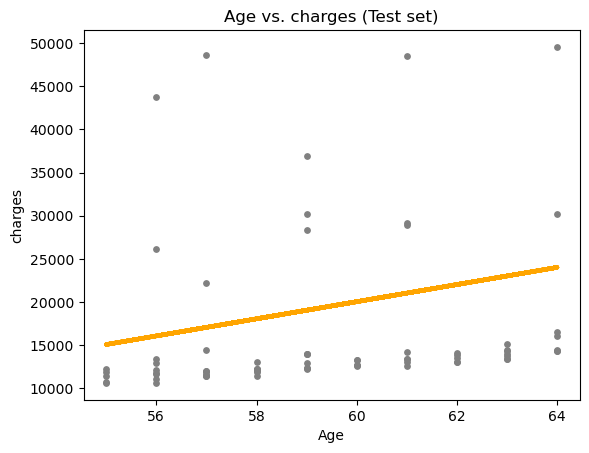

In [49]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Age vs. charges (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('charges')
plot_test.show()

In [82]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_predicted)

# Calculate RMSE as the square root of MSE
rmse = sqrt(mse)

# Calculate R2 score
r2 = r2_score(y_test, y_predicted)

# Print the model summary statistics
print('Mean squared error (RMSE): ', rmse)
print('R2 score: ', r2)

Mean squared error (RMSE):  12414.977194951443
R2 score:  0.05879287466812988


In [83]:
# Print the model summary statistics.
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  12414.977194951443
R2 score:  0.05879287466812988


In [84]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(5)

,Actual,Predicted
0,1633.9618,15772.620396
1,8547.6913,12625.199187
2,9290.1395,13221.552680
3,32548.3405,12890.245184
4,9644.2525,9215.743868


In [53]:
# Compare how the regression fits the training set

In [54]:
# Predict.
# This is predicting X_train!
y_predicted_train = regression.predict(X_train) 

In [55]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [56]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[993.74320086]]
Mean squared error:  136609070.3781498
R2 score:  0.0573922719368396


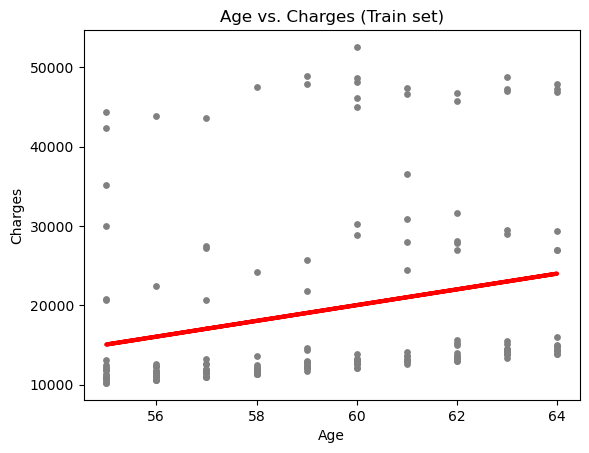

In [57]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs. Charges (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

The relationship between 'age' and 'charges' has** weakened, with a reduced correlation. The linear regression model's performance is subpar,** with data points scattered around the trend line. The **low R2 score of 0.10 and higher mean squared error** confirm the model's inadequate fit. Age alone is not a strong determinant of individual medical charges, with only a slight average decrease with increasing age. **Further factors beyond age are likely influencing medical expenses,** and a more sophisticated approach or consideration of other variables is necessary to gain a deeper understanding of charge determinants.

In [58]:
# There is a significant correlation between BMI and medical charges

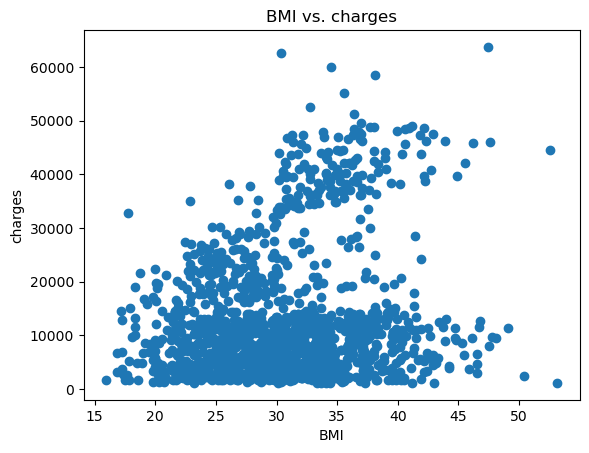

In [59]:
# Scatterplot for BMI and Charges variables plot against each other.
plt.scatter(x=df['BMI'], y=df['charges'])
plt.title('BMI vs. charges')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.show()

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['BMI'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [61]:
X

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [62]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [63]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
# Regression Analysis

In [65]:
# Create a regression object.
# Regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [66]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [67]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

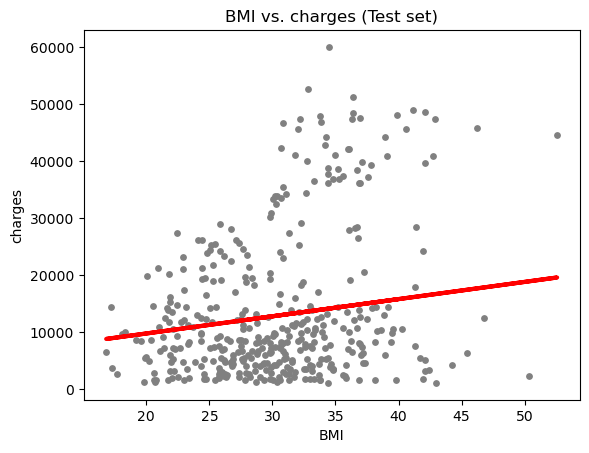

In [68]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('BMI vs. charges (Test set)')
plot_test.xlabel('BMI')
plot_test.ylabel('charges')
plot_test.show()

In [69]:
# Create objects that contain the model summary statistics.
# This is the mean squared error
rmse = mean_squared_error(y_test, y_predicted) 
 # This is the R2 score.
r2 = r2_score(y_test, y_predicted)

In [70]:
# Print the model summary statistics.
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  154131658.7511644
R2 score:  0.05879287466812988


In [71]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,15772.620396
1,8547.69130,12625.199187
2,9290.13950,13221.552680
3,32548.34050,12890.245184
4,9644.25250,9215.743868
5,2680.94930,9101.292188
6,2198.18985,11705.067915
7,1241.56500,9742.823975
8,2710.82855,11533.390395
9,12235.83920,14766.650364


In [72]:
# Compare how the regression fits the training set

In [73]:
# Predict.
# This is predicting X_train!
y_predicted_train = regression.predict(X_train)

In [74]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [75]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  135599557.42526153
R2 score:  0.02444033897433817


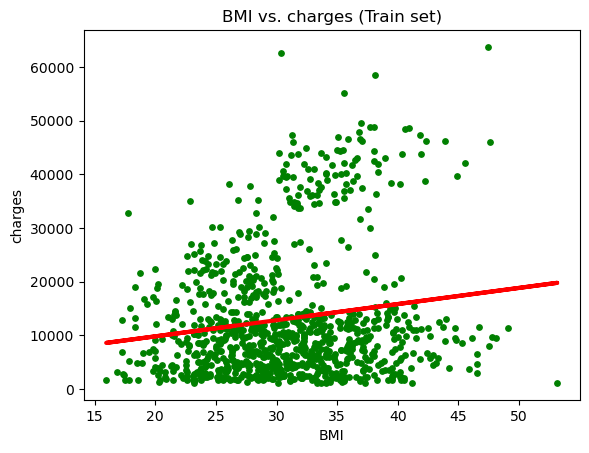

In [76]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('BMI vs. charges (Train set)')
plot_test.xlabel('BMI')
plot_test.ylabel('charges')
plot_test.show()

Based on these findings, it is difficult to conclusively claim that **higher BMI levels cause higher medical expenses per person**. The **high RMSE and low R2 square** indicate that **the model performs poorly and that the predictions are unreliable.** It is clear that the model cannot be used in this situation, hence **additional adjustments or creative solutions are needed to create a more useful model.**

#### Conclusion

We can't say with certainty that a person's **age or body mass index (BMI) by themselves will determine their expenses**. Given that there is a dearth of data on elderly people, we most certainly need a larger dataset to draw more accurate conclusions. When determining the **total insurance costs for each person, several additional potential considerations should be considered.** Beyond age and BMI, **the complexity of insurance pricing may take into account several other variables and concerns**, therefore more research is required to identify the full range of important elements.